___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [4]:
pip install plotly

     ---------------------------------------- 15.2/15.2 MB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import plotly
from sklearn.model_selection import train_test_split
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Bunu lokal olarak interaktif cizime izin vermek icin yazdik
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [107]:
df_female = pd.read_csv (r"ANSUR II FEMALE Public.csv", encoding = "ISO-8859-1")
df_male   = pd.read_csv (r"ANSUR II MALE Public.csv", encoding = "ISO-8859-1")

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,...,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,...,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,...,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,...,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,...,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,...,762,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,29501,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,...,836,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
1982,29502,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,...,804,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
1983,29503,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,...,774,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
1984,29511,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,...,769,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand


## Explore Data

In [8]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,...,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,...,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,...,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,...,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,...,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,...,762,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [9]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,...,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,...,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,...,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,...,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,...,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,...,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [ ]:
# Feature sayisi cok fazla

In [108]:
df_m = df_male
df_f = df_female

In [109]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [110]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [14]:
df_f.describe()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,...,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,...,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000
mean,22306.606,229.651,1335.095,311.198,215.740,1239.030,228.110,182.051,365.349,305.579,273.300,450.324,67.048,311.013,287.979,...,1559.409,425.403,299.894,860.905,213.031,355.136,980.149,677.582,154.793,794.190,35.072,1.781,28.944,64.602,147.505
std,20904.730,31.465,58.080,17.165,14.892,55.802,11.771,9.642,18.299,30.757,22.260,28.687,3.486,14.162,15.299,...,75.986,26.389,32.959,99.932,31.374,23.945,50.023,109.846,7.828,38.195,955.583,1.000,8.332,2.802,22.855
min,10037.000,155.000,1115.000,249.000,170.000,1038.000,194.000,151.000,283.000,216.000,197.000,357.000,55.000,267.000,245.000,...,1342.000,345.000,211.000,611.000,138.000,289.000,805.000,358.000,124.000,672.000,1.000,1.000,17.000,56.000,86.000
25%,17667.000,207.000,1298.000,300.000,205.000,1202.000,220.000,175.000,353.000,285.000,258.000,430.000,65.000,302.000,277.000,...,1508.000,407.000,276.000,790.000,190.000,338.000,947.000,601.000,150.000,769.000,1.000,1.000,22.000,63.000,130.000
50%,22096.500,227.000,1332.000,311.000,215.000,1236.000,227.000,182.000,365.000,304.000,273.000,450.000,67.000,311.000,287.500,...,1555.000,424.500,298.000,852.000,209.000,355.000,977.500,668.000,154.000,794.000,2.000,2.000,27.000,64.000,145.000
75%,26089.750,249.000,1374.000,323.000,225.000,1277.000,236.000,188.000,378.000,324.000,287.000,469.000,69.000,321.000,297.000,...,1610.000,442.000,321.000,925.000,232.000,370.000,1013.000,745.750,160.000,819.000,3.000,2.000,34.000,66.000,161.000
max,920103.000,358.000,1536.000,371.000,275.000,1419.000,270.000,216.000,422.000,435.000,362.000,558.000,83.000,370.000,378.000,...,1828.000,532.000,461.000,1334.000,367.000,432.000,1142.000,1196.000,183.000,941.000,42351.000,6.000,58.000,80.000,270.000


In [111]:
df_f.columns = df_f.columns.str.lower()

In [112]:
df_m.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000,4082.000
mean,20003.371,254.651,1440.737,335.244,229.344,1329.082,252.017,200.935,415.676,358.136,275.433,510.425,74.785,331.651,315.713,142.622,1019.519,245.849,887.867,617.953,502.925,392.261,1517.300,289.441,1058.706,253.847,1291.119,845.930,622.344,355.917,36.062,64.215,23.174,245.042,804.513,101.859,271.178,349.010,310.059,579.928,480.214,1130.153,88.261,212.284,193.278,154.330,574.373,199.505,343.473,72.506,345.733,379.297,1061.629,640.156,430.854,450.163,488.388,554.156,491.658,72.904,409.288,122.644,397.649,434.596,1426.679,116.456,429.804,267.883,1178.587,363.710,149.776,918.290,895.847,593.124,1814.154,1756.215,1438.592,1120.669,625.142,180.460,811.925,468.207,131.147,900.931,1664.804,477.612,326.437,940.577,237.771,387.643,1056.485,855.240,175.917,847.512,8.974,1.534,30.159,70.036,188.005
std,6568.435,37.327,63.287,17.483,14.649,59.516,12.936,10.471,19.162,34.618,17.514,32.506,4.118,14.038,16.648,6.219,76.681,26.459,49.919,30.589,27.429,29.709,63.278,18.279,87.435,26.247,56.957,46.499,46.677,29.496,3.024,4.507,3.000,28.654,33.160,5.234,13.103,18.015,21.991,50.929,23.286,56.144,4.388,10.243,9.946,5.532,16.049,7.025,16.620,5.474,24.165,30.205,52.015,34.193,35.247,30.489,28.126,27.946,26.582,5.667,31.873,6.666,25.777,25.674,67.715,6.233,24.821,15.417,63.586,18.201,10.513,35.698,40.220,30.820,84.632,68.551,61.246,53.610,58.452,15.589,43.676,26.612,6.158,49.172,89.528,27.

In [113]:
df_m.columns = df_m.columns.str.lower()

In [114]:
df_f.shape

(1986, 108)

In [115]:
df_m.shape

(4082, 108)

In [ ]:
# Female örnek daha az, yaklasik dörtte biri kadar

In [116]:
df_f.isnull().sum().sum()

1467

In [117]:
df_m.isnull().sum().sum()

3180

In [118]:
df_total=pd.concat([df_m, df_f])

In [30]:
df_total.head()


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,...,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,...,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,...,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,...,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,...,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,...,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [119]:
df_total.isnull().sum().sum()

4647

In [120]:
df_t = df_total

In [35]:
df_t['dodrace']

0       1
1       1
2       2
3       1
4       2
       ..
1981    3
1982    3
1983    2
1984    3
1985    3
Name: dodrace, Length: 6068, dtype: int64

In [121]:
df_t['dodrace'].shape

(6068,)

In [122]:
df_t['dodrace'].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

In [123]:
df_f['dodrace'].isnull().sum()

0

In [124]:
df_m['dodrace'].isnull().sum()

0

<AxesSubplot:ylabel='dodrace'>

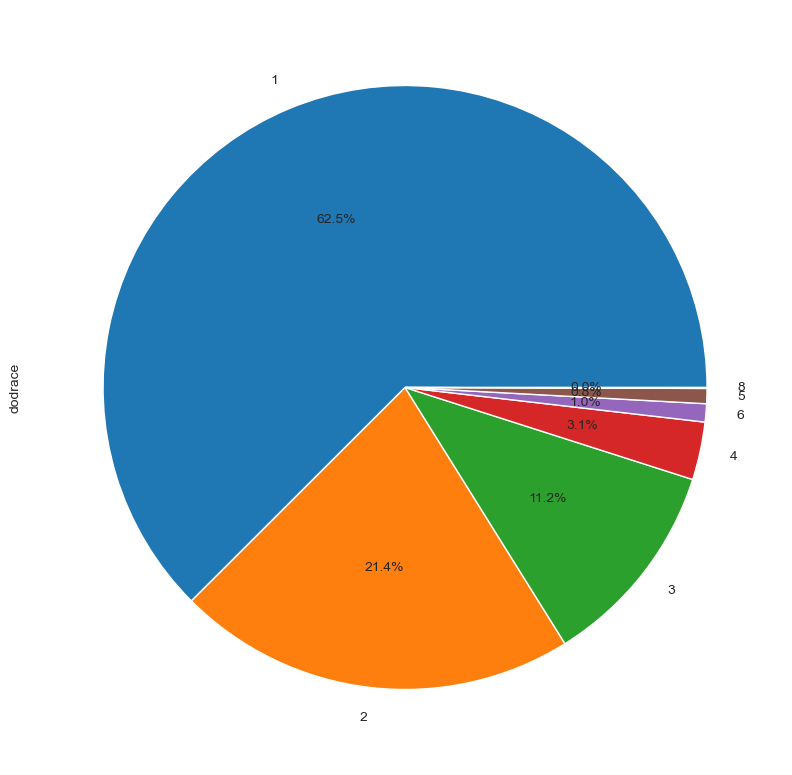

In [21]:
df_t["dodrace"].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10))

In [19]:
df_t.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [ ]:
# object olanlar mevcut..

In [41]:
for i in df_t.columns:
    print(f"{i:<40}: {df_t[i].nunique()}")

subjectid                               : 6068
abdominalextensiondepthsitting          : 218
acromialheight                          : 432
acromionradialelength                   : 133
anklecircumference                      : 112
axillaheight                            : 402
balloffootcircumference                 : 107
balloffootlength                        : 86
biacromialbreadth                       : 169
bicepscircumferenceflexed               : 237
bicristalbreadth                        : 132
bideltoidbreadth                        : 244
bimalleolarbreadth                      : 37
bitragionchinarc                        : 107
bitragionsubmandibulararc               : 125
bizygomaticbreadth                      : 50
buttockcircumference                    : 429
buttockdepth                            : 161
buttockheight                           : 322
buttockkneelength                       : 209
buttockpopliteallength                  : 185
calfcircumference                   

In [20]:
df_t.duplicated().sum()

0

In [44]:
df_t.shape

(6068, 108)

In [46]:
df_m.shape

(4082, 108)

In [47]:
df_t.shape

(6068, 108)

In [49]:
df_t['ethnicity'].isnull().sum().sum()

4647

In [50]:
df_t.isnull().sum().sum()

4647

In [ ]:
# Bütün null value'lar ethnicity de...

In [22]:
df_t.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [68]:
df_t.drop(['level_0'], axis =1, inplace =True) # Concat ederken ilk denemedeki yanliskliklardan ötürü kalanlar..

In [69]:
df_t.drop(['index'], axis =1, inplace =True)   # Concat ederken ilk denemedeki yanliskliklardan ötürü kalanlar..

In [70]:
df_t.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,...,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,...,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,...,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,...,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,...,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,...,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [71]:
df_t.tail()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,...,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
6063,29501,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,...,836,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
6064,29502,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,...,804,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
6065,29503,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,...,774,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
6066,29511,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,...,769,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand
6067,920103,238,1346,308,210,1256,236,188,361,285,279,433,71,304,278,...,797,Female,28-May-11,Fort McCoy,Army National Guard,Combat Support,92F,Texas,3,Mexican,3,27,66,132,Right hand


In [125]:
df_t.drop(['subjectid'], inplace=True, axis =1) # gerek yok

In [ ]:
# Drop null data

In [78]:
df_t.describe().T[:50]

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.000,246.469,37.400,155.000,219.000,242.000,271.000,451.000
acromialheight,6068.000,1406.161,79.091,1115.000,1350.000,1410.000,1462.000,1683.000
acromionradialelength,6068.000,327.374,20.720,249.000,313.000,328.000,341.250,393.000
anklecircumference,6068.000,224.891,16.052,156.000,214.000,225.000,235.000,293.000
axillaheight,6068.000,1299.609,72.022,1038.000,1249.000,1302.000,1349.000,1553.000
balloffootcircumference,6068.000,244.193,16.845,186.000,232.000,245.000,256.000,306.000
balloffootlength,6068.000,194.755,13.516,151.000,185.000,195.000,204.000,245.000
biacromialbreadth,6068.000,399.204,30.237,283.000,376.000,404.000,421.000,489.000
bicepscircumferenceflexed,6068.000,340.934,41.520,216.000,311.000,341.000,370.000,490.000
bicristalbreadth,6068.000,274.735,19.221,197.000,262.000,274.000,288.000,362.000


In [82]:
df_t.select_dtypes(include ="object")

,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,ethnicity,writingpreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,Right hand
...,...,...,...,...,...,...,...,...,...
6063,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Mexican,Right hand
6064,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Mexican,Right hand
6065,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,NaN,Right hand
6066,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Mexican,Right hand


In [127]:
df_t.primarymos

0       19D
1       68W
2       68W
3       88M
4       92G
       ... 
1981    42A
1982    25U
1983    42A
1984    92Y
1985    92F
Name: primarymos, Length: 6068, dtype: object

In [83]:
df_t.select_dtypes (include = "number")

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,...,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,subjectnumericrace,dodrace,age,heightin,weightlbs
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,...,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1,1,41,71,180
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,...,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1,1,35,68,160
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,...,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,2,2,42,68,205
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,...,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1,1,31,66,175
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,...,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,2,2,21,77,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,1089,255,856,652,541,373,1457,290,1082,293,...,1716,1687,1391,1119,660,155,749,446,136,872,1706,447,334,1043,265,370,1002,832,162,836,3,3,51,67,180
6064,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,145,1016,246,818,572,464,375,1390,291,1016,269,...,1620,1613,1316,1043,616,157,721,422,131,838,1648,446,334,971,243,374,958,717,157,804,3,3,40,63,150
6065,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,139,1063,262,846,637,525,370,1412,285,1093,286,...,1740,1644,1337,1054,640,159,758,449,127,862,1590,444,335,982,254,351,970,762,159,774,2,2,40,66,168
6066,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,137,1051,225,786,582,480,370,1377,270,922,243,...,1628,1616,1288,1028,623,163,725,419,135,802,1525,450,298,837,208,335,952,632,146,769,3,3,31,63,133


In [84]:
num_columns = df_t.select_dtypes (include = "number").columns

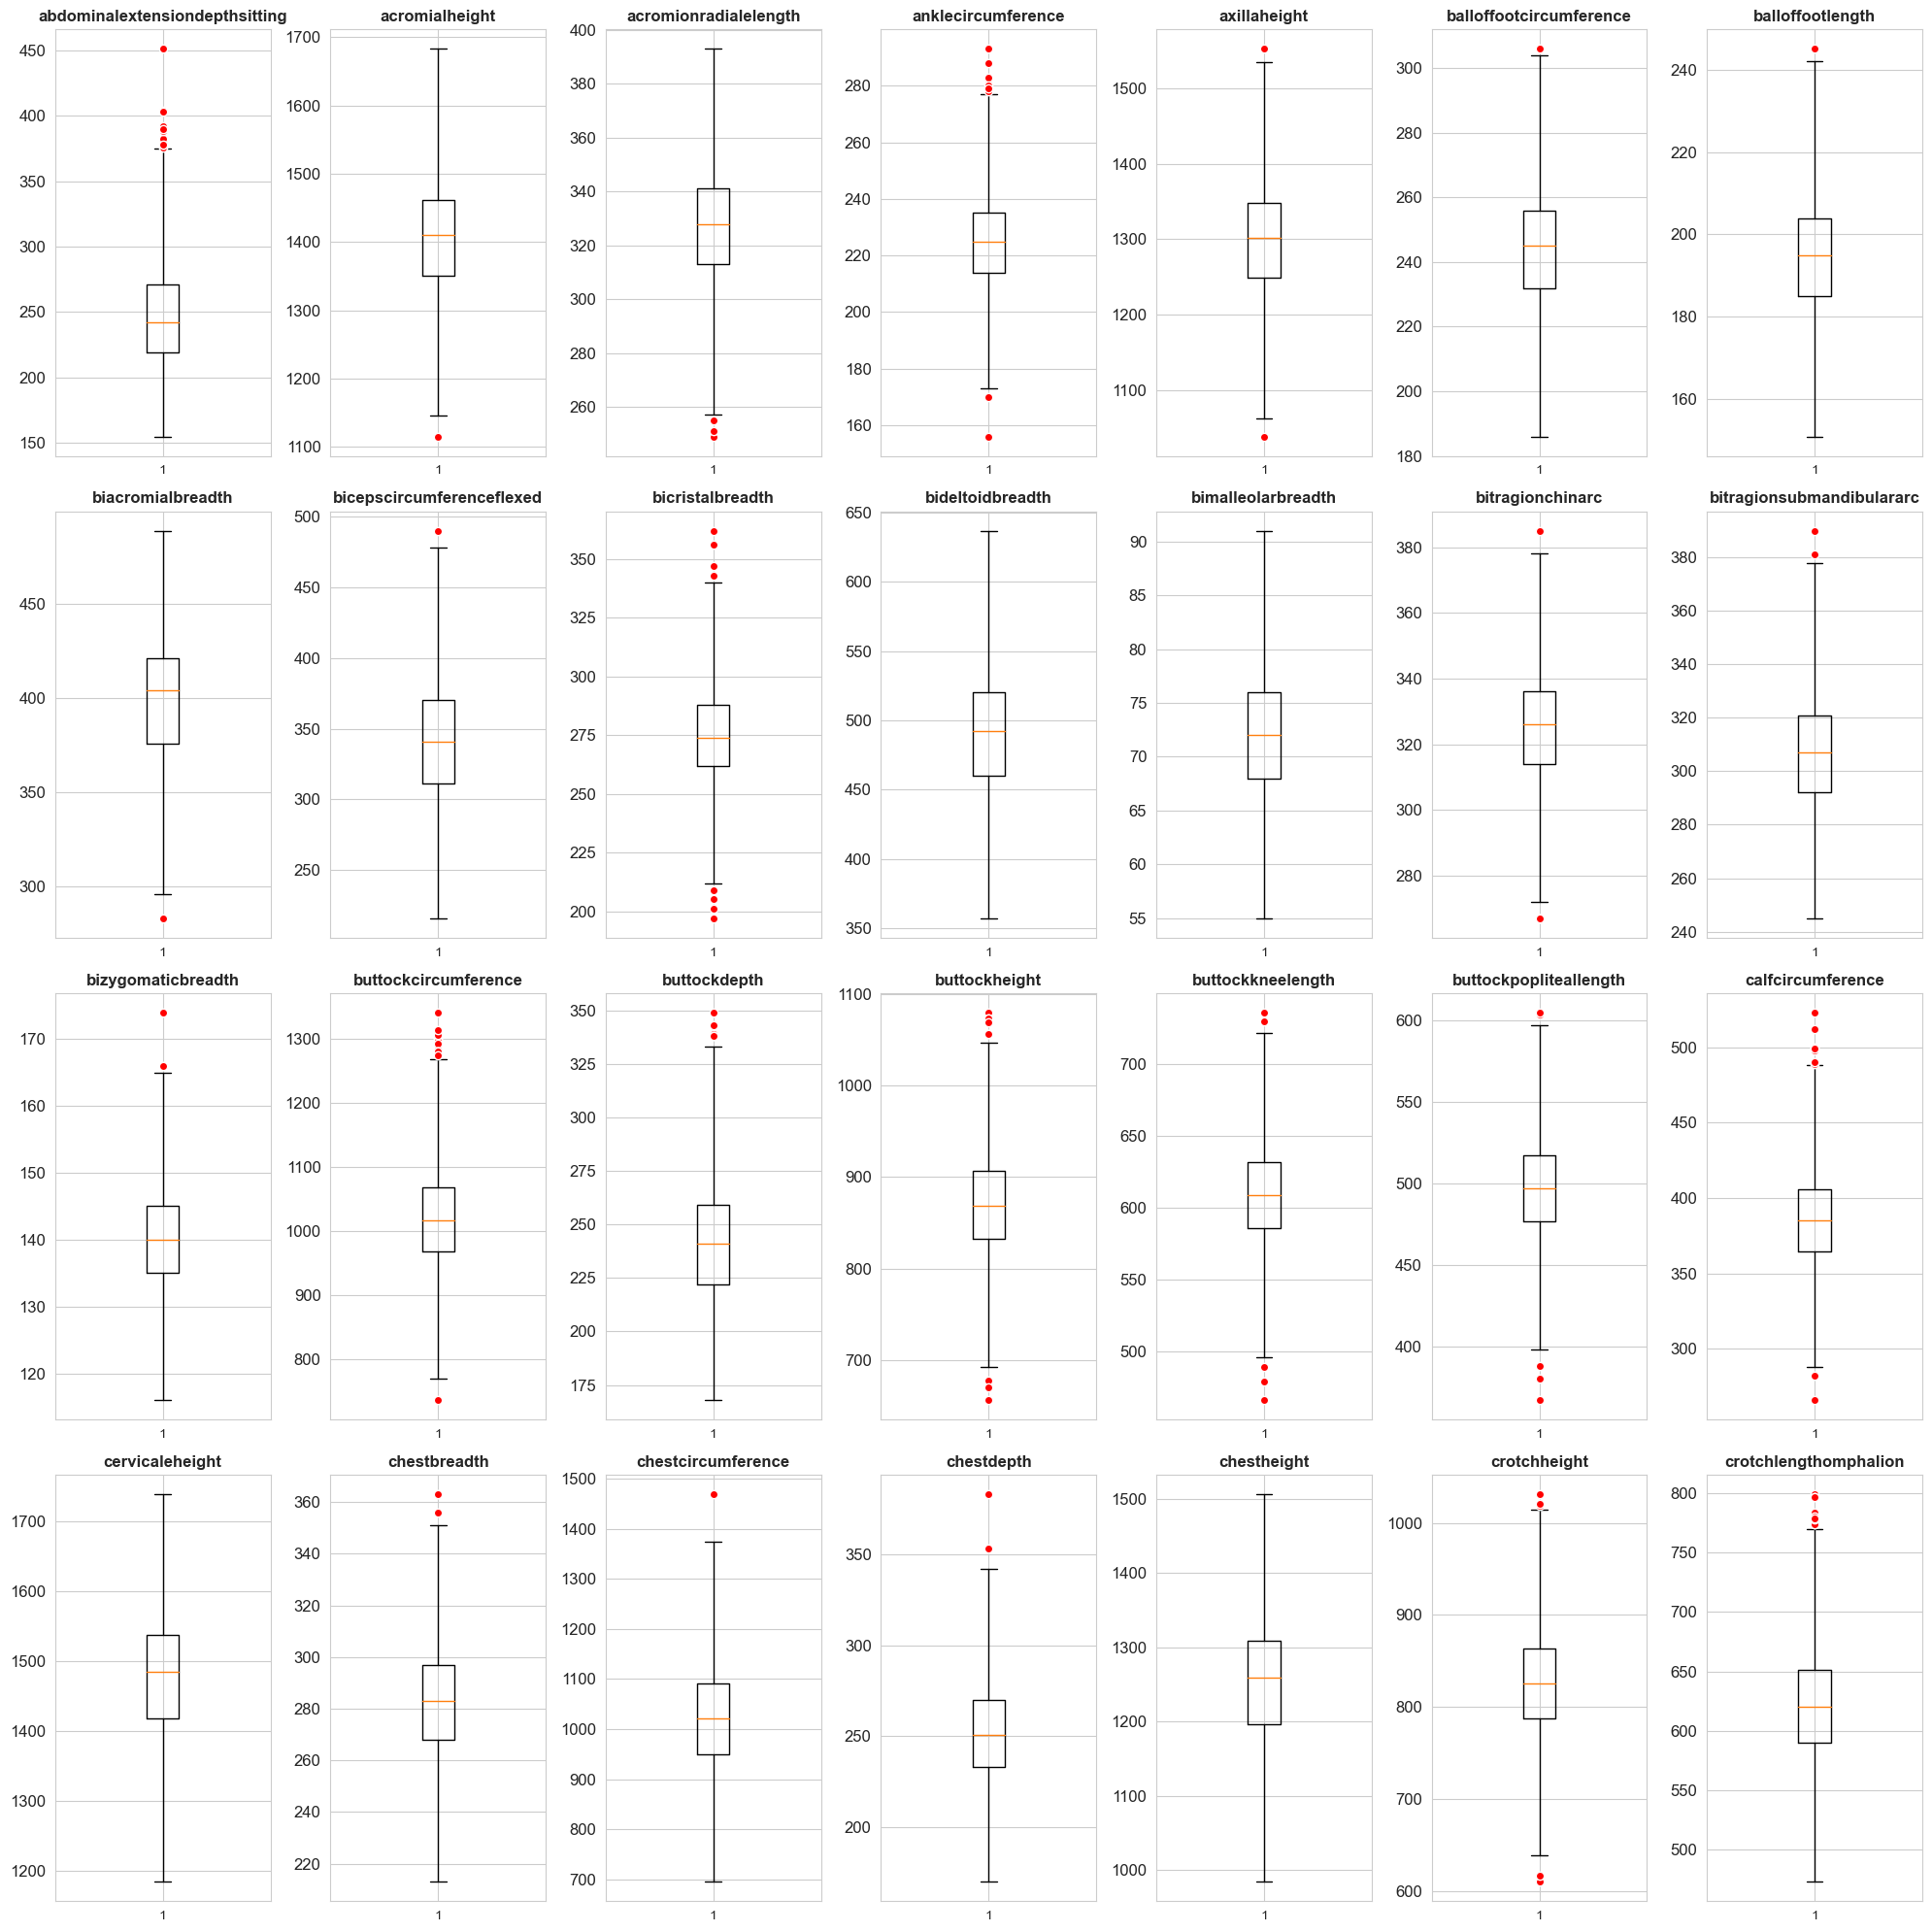

In [87]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(4, 7, figsize=(20,20))
for i, ax in enumerate(axs.flat):
    ax.boxplot(df_t[num_columns[i]], flierprops=red_circle, whis=2)
    ax.set_title(num_columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
plt.tight_layout()
num_columns = df_t.select_dtypes(include="number").columns

In [128]:
#Let's drop null data.
drop_list =[]
for col in df_t:
    if df_t[col].isnull().sum()>1800:
        print(f"{col} = {df_t[col].isnull().sum()}")
        drop_list.append(col)
drop_list

ethnicity = 4647


['ethnicity']

In [ ]:
# Sadece ethnicity'de bol bol null var..

In [129]:
df_t.drop(["ethnicity"], axis=1, inplace = True)

In [130]:
df_t.isnull().sum().sum()

0

In [ ]:
# Ethnicity'den bir sekilde Target'a aktarim yapardik ama vakit kisitli..

In [28]:
print(df_t["dodrace"].value_counts())

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64


In [ ]:
# Biz son üc tanesini atalim, azlar..

In [131]:
for col in df_t.select_dtypes("object"):
    print(f"{col} has {df_t[col].nunique()} unique value")

gender has 2 unique value
date has 253 unique value
installation has 12 unique value
component has 3 unique value
branch has 3 unique value
primarymos has 285 unique value
subjectsbirthlocation has 152 unique value
writingpreference has 3 unique value


In [132]:
df_t.dodrace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [133]:
df_t["dodrace"] = df_t.dodrace.map({1:"White", 2:"Black", 3:"Hispanic", 4:"Asian", 5:"Native American", 6:"Pacific Islander", 8:"Other"})

In [38]:
df_t.groupby(["component"])["dodrace"].value_counts(normalize=True)

component            dodrace         
Army National Guard  White              0.685
                     Black              0.184
                     Hispanic           0.093
                     Asian              0.022
                     Native American    0.009
                     Pacific Islander   0.006
Army Reserve         White              0.518
                     Black              0.236
                     Hispanic           0.186
                     Asian              0.041
                     Pacific Islander   0.014
                     Native American    0.005
Regular Army         White              0.581
                     Black              0.238
                     Hispanic           0.123
                     Asian              0.038
                     Pacific Islander   0.012
                     Native American    0.008
                     Other              0.001
Name: dodrace, dtype: float64

<AxesSubplot:ylabel='component,dodrace'>

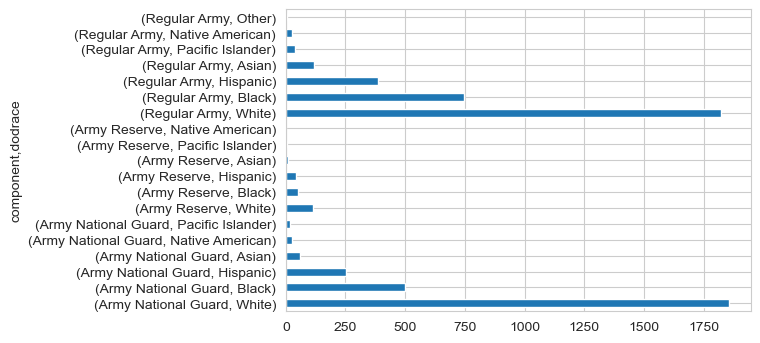

In [39]:
df_t.groupby(["component"])["dodrace"].value_counts().plot(kind="barh")

In [40]:
df_t.groupby(["component", "branch"])["dodrace"].value_counts(normalize=True)

component            branch                  dodrace         
Army National Guard  Combat Arms             White              0.772
                                             Black              0.098
                                             Hispanic           0.092
                                             Asian              0.022
                                             Native American    0.011
                                             Pacific Islander   0.005
                     Combat Service Support  White              0.644
                                             Black              0.219
                                             Hispanic           0.100
                                             Asian              0.023
                                             Pacific Islander   0.008
                                             Native American    0.007
                     Combat Support          White              0.662
                            

In [134]:
df_t.drop(["date"], axis=1, inplace=True)

In [135]:
df_t.drop(["installation"], axis=1, inplace=True)

In [136]:
df_t.drop(["component"],  axis=1, inplace=True)

In [137]:
df_t.drop(["branch"], axis=1, inplace=True)

In [138]:
df_t.drop(["primarymos"], axis=1, inplace=True)

In [139]:
df_t.drop(["weightlbs"], axis=1, inplace=True)

In [140]:
df_t.drop(["heightin"],axis=1, inplace=True)

In [141]:
df_t.drop("subjectnumericrace", axis=1, inplace=True)

In [142]:
df_t.dodrace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: dodrace, dtype: int64

In [143]:
df_t= df_t[(df_t["dodrace"]== "White") | (df_t["dodrace"]== "Black") | (df_t["dodrace"]== "Hispanic") | (df_t["dodrace"]== "Asian")]

In [62]:
df_t.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subjectsbirthlocation,dodrace,age,writingpreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand


In [ ]:
# I've selected the items which has more than 2 digits

In [144]:
df_t.reset_index(drop=True, inplace=True)   # indexleri degerlendirmemesi, düzenlemesi icin.. Drop islemlerinden sonra yapmak iyidir

<AxesSubplot:>

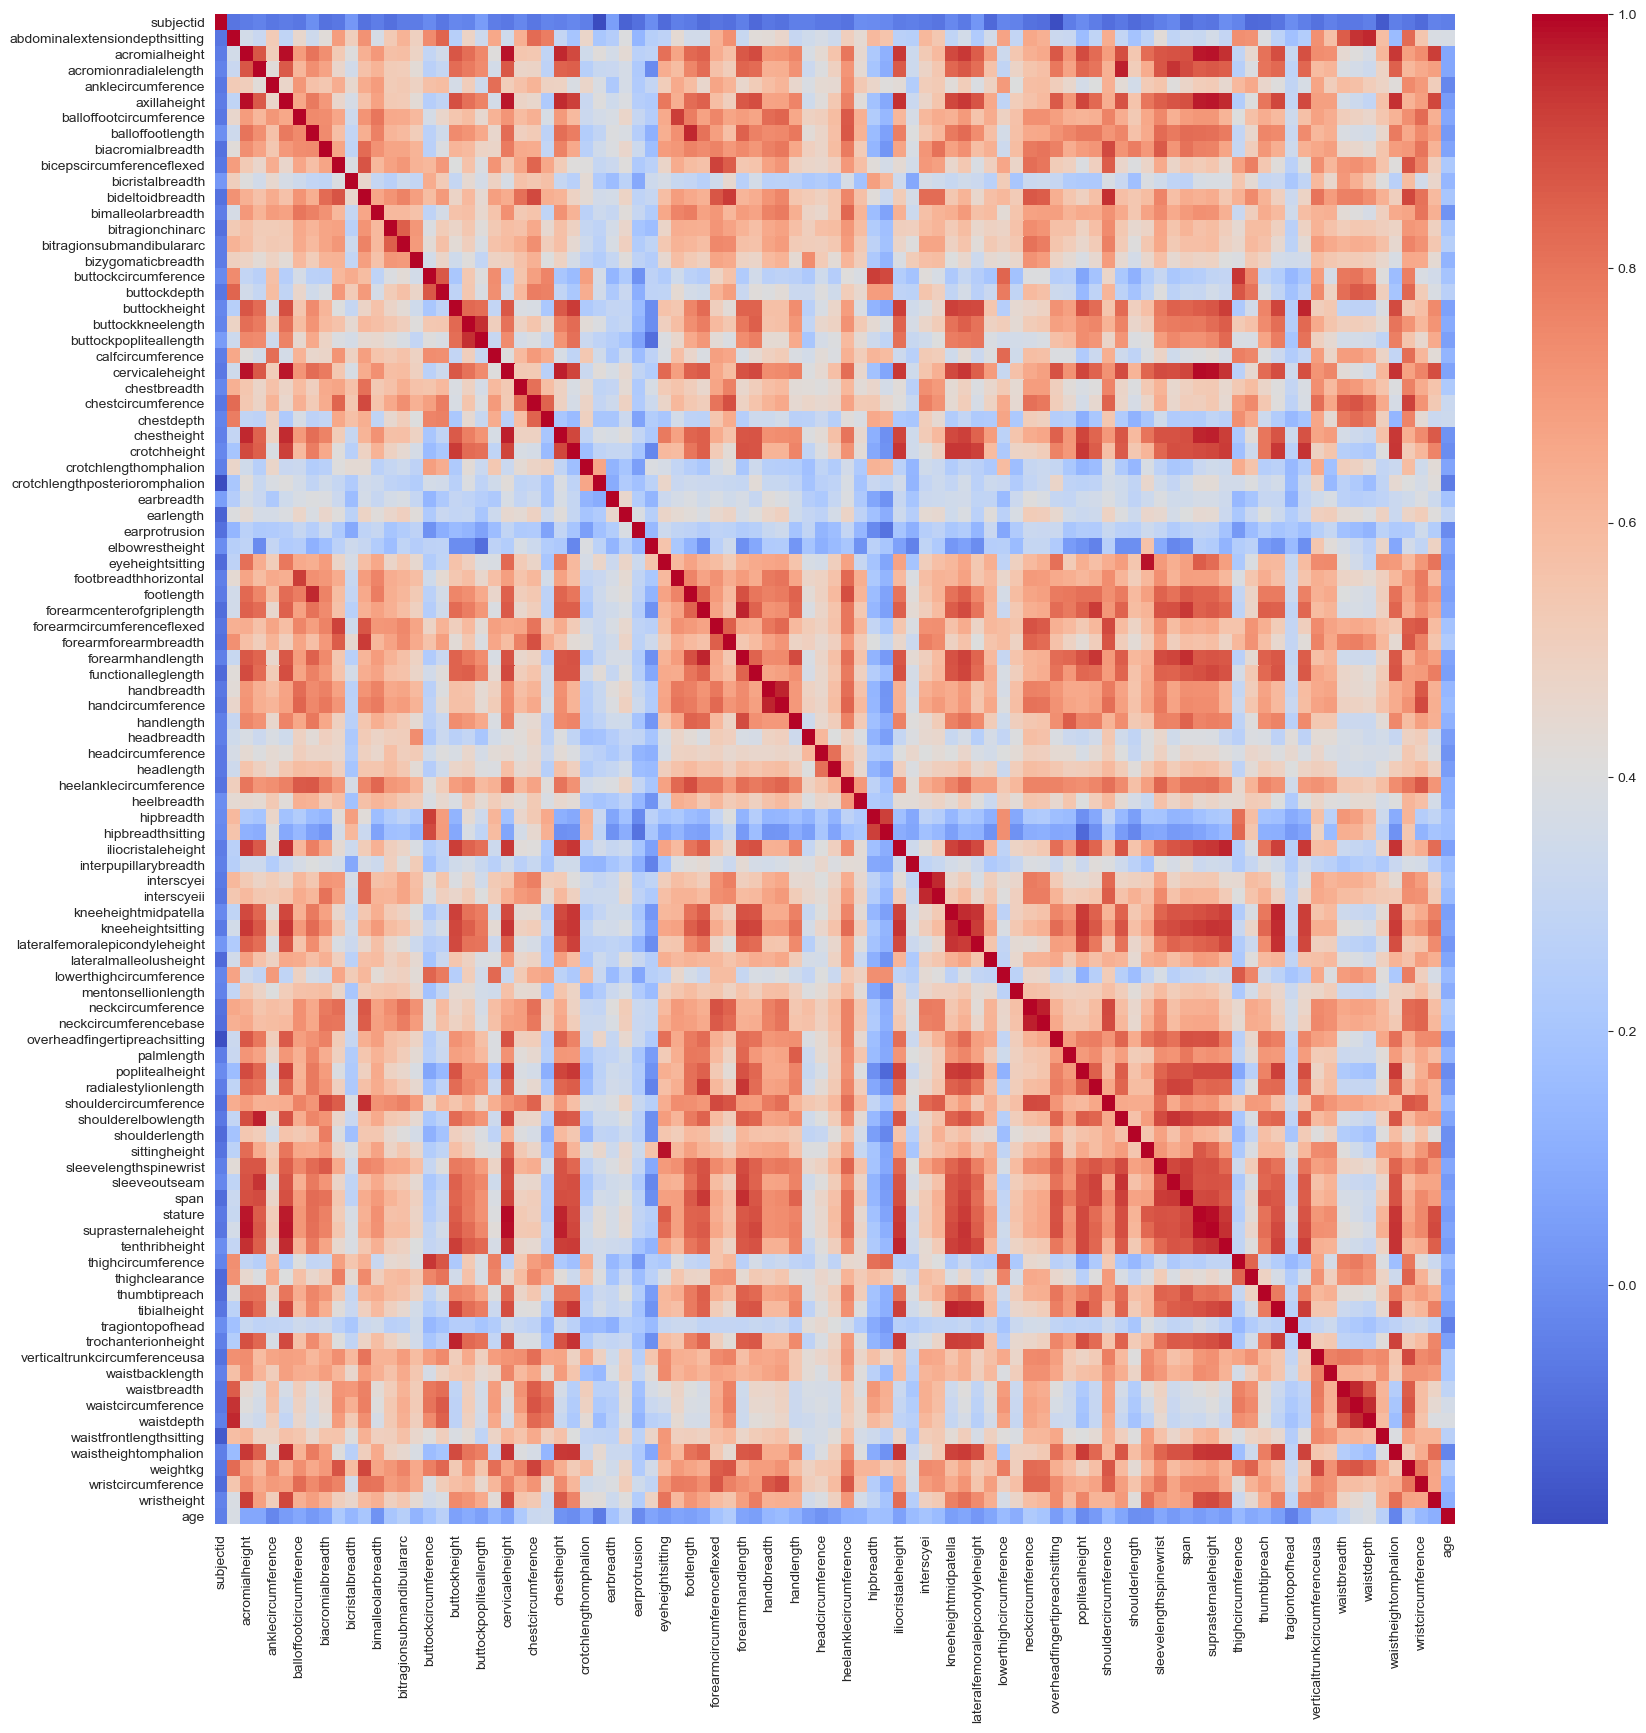

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(df_t.corr(), cmap="coolwarm")

In [ ]:
# Kirmizilarda multicollinearity riski mevcut olabilir. Diger feature'lari baskilayarak feature importance tespitinde arizaya neden olur.

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [145]:
X= df_t.drop('dodrace', axis=1)

In [146]:
X=pd.get_dummies(data=X, drop_first=True) # Lets convert categorical data
y= df_t.dodrace

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60, stratify=y)
#stratify bagimli degiskenin kategorik olarak train ve testi bölerken orantisal dagilimini sagliyor. Anlamadim.
# Test ve train setlerde orantili sekilde target larin olmasi icin.

In [148]:
print("Train features shape:", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

Train features shape: (4765, 245)
Train target shape (4765,)
Test features shape (1192, 245)
Test target shape (1192,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [149]:
def eval_metric(model, X_train,y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred=model.predict (X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [150]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight="balanced",max_iter=10000, random_state=60) )]

In [ ]:
#Pipeline avantaji= otomasyon yapar. Islemleri sirayla yapar. Scaling'i bizim yerimize yapar.
#class_weight'in balance olmasi : Sample sayisi az olan siniflarin dagilimlarini/agirliklarini esitlemeye calisir.

In [151]:
pipe_log_model=Pipeline(steps=operations)

In [ ]:
# Vanilla basic demek

In [152]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 29   0   5   3]
 [  4 237  11   8]
 [  7   5 105  19]
 [ 32  13  84 630]]
              precision    recall  f1-score   support

       Asian       0.40      0.78      0.53        37
       Black       0.93      0.91      0.92       260
    Hispanic       0.51      0.77      0.62       136
       White       0.95      0.83      0.89       759

    accuracy                           0.84      1192
   macro avg       0.70      0.82      0.74      1192
weighted avg       0.88      0.84      0.85      1192


Train_Set
[[ 135    2    5    9]
 [   7  968   35   28]
 [  15   21  439   68]
 [ 101   66  343 2523]]
              precision    recall  f1-score   support

       Asian       0.52      0.89      0.66       151
       Black       0.92      0.93      0.92      1038
    Hispanic       0.53      0.81      0.64       543
       White       0.96      0.83      0.89      3033

    accuracy                           0.85      4765
   macro avg       0.73      0.87      0.78      

In [153]:
# Since the problem multiclass we can assign target class with make_scorer
scoring={"f1_Hispanic" : make_scorer(f1_score, average= None,  labels=["Hispanic"]), 
         "precision_Hispanic" : make_scorer (precision_score, average=None, labels=["Hispanic"]),
         "recall_Hispanic" : make_scorer(recall_score, average = None, labels = ["Hispanic"])}

In [161]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight="balanced",max_iter=10000, random_state=60) )]

In [162]:
model=Pipeline(steps=operations)

In [163]:
scores= cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
df_scores= pd.DataFrame(scores, index =range(1,11))
df_scores.mean()[2:]

test_f1_Hispanic          0.578
test_precision_Hispanic   0.480
test_recall_Hispanic      0.729
dtype: float64

### Logistic Model GridsearchCV

In [164]:
recall_Hispanic =make_scorer(recall_score, average=None, labels=["Hispanic"])

In [170]:
param_grid = { "log__C" : [1,5,10],
             'log__penalty': ["l1", "l2"],    # ridge ve lasso
             "log__solver": ["liblinear", 'lbfgs']}

In [171]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight="balanced",max_iter=10000, random_state=60) )]

In [172]:
model=Pipeline(steps=operations)

In [173]:
log_model_grid = GridSearchCV(model, param_grid, verbose = 3, scoring=recall_Hispanic, n_jobs=1, cv=5)
# verbose = Hangi araliklar ile asagidaki raporu vermesi gerektigi

In [174]:
log_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END log__C=1, log__penalty=l1, log__solver=liblinear;, score=0.661 total time=   3.4s
[CV 2/5] END log__C=1, log__penalty=l1, log__solver=liblinear;, score=0.624 total time=   3.6s
[CV 3/5] END log__C=1, log__penalty=l1, log__solver=liblinear;, score=0.569 total time=   4.2s
[CV 4/5] END log__C=1, log__penalty=l1, log__solver=liblinear;, score=0.565 total time=   3.7s
[CV 5/5] END log__C=1, log__penalty=l1, log__solver=liblinear;, score=0.676 total time=   3.7s
[CV 1/5] END log__C=1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END log__C=1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END log__C=1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END log__C=1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END log__C=1, log__penalty=l1, log__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END log__C

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=60))]),
             n_jobs=1,
             param_grid={'log__C': [1, 5, 10], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [175]:
log_model_grid.best_params_ # Logistic regression default degerlerini verdi, dolayisi ile sonuc da ayni cikti

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [176]:
log_model_grid.best_score_

0.7311756710839279

In [177]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[ 29   0   5   3]
 [  4 237  11   8]
 [  7   5 105  19]
 [ 32  13  84 630]]
              precision    recall  f1-score   support

       Asian       0.40      0.78      0.53        37
       Black       0.93      0.91      0.92       260
    Hispanic       0.51      0.77      0.62       136
       White       0.95      0.83      0.89       759

    accuracy                           0.84      1192
   macro avg       0.70      0.82      0.74      1192
weighted avg       0.88      0.84      0.85      1192


Train_Set
[[ 135    2    5    9]
 [   7  968   35   28]
 [  15   21  439   68]
 [ 101   66  343 2523]]
              precision    recall  f1-score   support

       Asian       0.52      0.89      0.66       151
       Black       0.92      0.93      0.92      1038
    Hispanic       0.53      0.81      0.64       543
       White       0.96      0.83      0.89      3033

    accuracy                           0.85      4765
   macro avg       0.73      0.87      0.78      

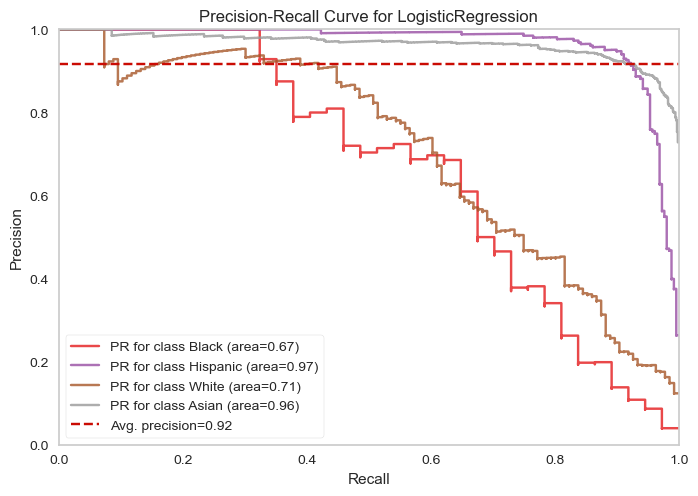

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [181]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight="balanced",max_iter=10000, random_state=60) )]
model = Pipeline (steps=operations)

viz = PrecisionRecallCurve(model, per_class=True, classes= ["Black", "Hispanic", "White", "Asian"],
                          cmap= "Set1")
viz.fit(X_train, y_train)
viz.score(X_test,y_test)
viz.show()

In [182]:
viz.score_

{'Black': 0.6714367667125987,
 'Hispanic': 0.9673437383312131,
 'White': 0.7063236850345964,
 'Asian': 0.9642079375931636,
 'micro': 0.9158013597122658}

In [183]:
y_pred = log_model_grid.predict(X_test)  # Bunlari ileride karsilastirmak icin..
log_AP =viz.score_["Hispanic"]
log_f1=f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall=recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [184]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=60) )]
pipe_svc_model = Pipeline(steps=operations_svc) # SVC-Classifier, SVR-Regressor 

In [185]:
pipe_svc_model.fit(X_train, y_train)
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 26   0   5   6]
 [  1 235  12  12]
 [  7   5 104  20]
 [ 19  13 111 616]]
              precision    recall  f1-score   support

       Asian       0.49      0.70      0.58        37
       Black       0.93      0.90      0.92       260
    Hispanic       0.45      0.76      0.57       136
       White       0.94      0.81      0.87       759

    accuracy                           0.82      1192
   macro avg       0.70      0.80      0.73      1192
weighted avg       0.87      0.82      0.84      1192


Train_Set
[[ 128    2   13    8]
 [   6  949   42   41]
 [  13   23  443   64]
 [  78   61  420 2474]]
              precision    recall  f1-score   support

       Asian       0.57      0.85      0.68       151
       Black       0.92      0.91      0.92      1038
    Hispanic       0.48      0.82      0.61       543
       White       0.96      0.82      0.88      3033

    accuracy                           0.84      4765
   macro avg       0.73      0.85      0.77      

In [186]:
model=Pipeline(steps=operations_svc)
scores= cross_validate(model, X_train, y_train, scoring = scoring, cv =10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.551
test_precision_Hispanic   0.441
test_recall_Hispanic      0.739
dtype: float64

###  SVC Model GridsearchCV

In [187]:
param_grid = {"svc__C": [1,2,3], "svc__gamma" : ["scale", "auto", 1, 0.1, 0.01]} #gamma-kernel"in shape i.

In [ ]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=60) )]
pipe_svc_model = Pipeline(steps=operations_svc) # SVC-Classifier, SVR-Regressor

In [188]:
svm_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=recall_Hispanic, n_jobs=1)

In [189]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ........svc__C=1, svc__gamma=scale;, score=0.725 total time=   4.4s
[CV 2/5] END ........svc__C=1, svc__gamma=scale;, score=0.716 total time=   4.9s
[CV 3/5] END ........svc__C=1, svc__gamma=scale;, score=0.670 total time=   4.7s
[CV 4/5] END ........svc__C=1, svc__gamma=scale;, score=0.778 total time=   5.0s
[CV 5/5] END ........svc__C=1, svc__gamma=scale;, score=0.750 total time=   5.0s
[CV 1/5] END .........svc__C=1, svc__gamma=auto;, score=0.606 total time=   7.9s
[CV 2/5] END .........svc__C=1, svc__gamma=auto;, score=0.587 total time=   9.2s
[CV 3/5] END .........svc__C=1, svc__gamma=auto;, score=0.523 total time=   9.0s
[CV 4/5] END .........svc__C=1, svc__gamma=auto;, score=0.676 total time=   8.7s
[CV 5/5] END .........svc__C=1, svc__gamma=auto;, score=0.574 total time=   8.9s
[CV 1/5] END ............svc__C=1, svc__gamma=1;, score=0.541 total time=   8.3s
[CV 2/5] END ............svc__C=1, svc__gamma=1;

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=60))]),
             n_jobs=1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [190]:
svm_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 0.1}

In [ ]:
# Hocaninki ile farkli cikti..

In [191]:
svm_model_grid.best_score_

0.7348793747876317

In [192]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[ 24   0   5   8]
 [  2 236  11  11]
 [  8   5 103  20]
 [ 21  14  99 625]]
              precision    recall  f1-score   support

       Asian       0.44      0.65      0.52        37
       Black       0.93      0.91      0.92       260
    Hispanic       0.47      0.76      0.58       136
       White       0.94      0.82      0.88       759

    accuracy                           0.83      1192
   macro avg       0.69      0.78      0.72      1192
weighted avg       0.87      0.83      0.84      1192


Train_Set
[[ 141    1    5    4]
 [   5  959   34   40]
 [   7   20  450   66]
 [  67   53  386 2527]]
              precision    recall  f1-score   support

       Asian       0.64      0.93      0.76       151
       Black       0.93      0.92      0.93      1038
    Hispanic       0.51      0.83      0.63       543
       White       0.96      0.83      0.89      3033

    accuracy                           0.86      4765
   macro avg       0.76      0.88      0.80      

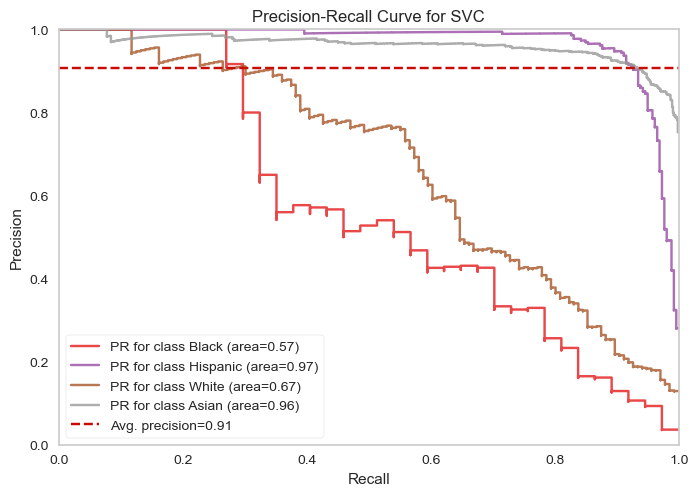

<AxesSubplot:title={'center':'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [193]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced", random_state=60) )]
model = Pipeline (steps=operations_svc)

viz = PrecisionRecallCurve(model, per_class=True, classes= ["Black", "Hispanic", "White", "Asian"],
                          cmap= "Set1")
viz.fit(X_train, y_train)
viz.score(X_test,y_test)
viz.show()

In [194]:
y_pred = svm_model_grid.predict(X_test)
svc_AP = viz.score_["Hispanic"]
svc_f1= f1_score(y_test, y_pred, average=None,labels = ["Hispanic"])
svc_recall=recall_score(y_test,y_pred, average=None, labels = ["Hispanic"])

## 3. RF

### Vanilla RF Model

In [224]:
from sklearn.preprocessing import OrdinalEncoder

In [225]:
X2 = df_t.drop ("dodrace", axis=1) # RF'de get dummies yerine Ordinal Encoder Kullaniyoruz
y= df_t.dodrace

In [226]:
cat = X2.select_dtypes("object").columns
cat

Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object')

In [227]:
enc =OrdinalEncoder()
X2[cat]= enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subjectsbirthlocation,age,writingpreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.000,99.000,41,2.000
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.000,94.000,35,1.000
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.000,94.000,42,1.000
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.000,146.000,31,2.000
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.000,98.000,21,2.000


In [254]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()  #

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subjectsbirthlocation,age,writingpreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.000,99.000,41,2.000
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.000,94.000,35,1.000
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.000,94.000,42,1.000
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.000,146.000,31,2.000
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.000,98.000,21,2.000


In [255]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=60, stratify=y) 

In [230]:
print("Train features shape :" , X_train2.shape)
print("Train target shape:", y_train2.shape)
print("Test features shape:", X_test2.shape)
print("Test target shape:" , y_test2.shape)

Train features shape : (4765, 97)
Train target shape: (4765,)
Test features shape: (1192, 97)
Test target shape: (1192,)


In [256]:
rf_model =RandomForestClassifier(class_weight="balanced", random_state=60)
rf_model.fit(X_train2,y_train2)

RandomForestClassifier(class_weight='balanced', random_state=60)

In [232]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[  4   0   1  32]
 [  0 163   1  96]
 [  0   6   5 125]
 [  1  11   0 747]]
              precision    recall  f1-score   support

       Asian       0.80      0.11      0.19        37
       Black       0.91      0.63      0.74       260
    Hispanic       0.71      0.04      0.07       136
       White       0.75      0.98      0.85       759

    accuracy                           0.77      1192
   macro avg       0.79      0.44      0.46      1192
weighted avg       0.78      0.77      0.72      1192


Train_Set
[[ 151    0    0    0]
 [   0 1038    0    0]
 [   0    0  543    0]
 [   0    0    0 3033]]
              precision    recall  f1-score   support

       Asian       1.00      1.00      1.00       151
       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3033

    accuracy                           1.00      4765
   macro avg       1.00      1.00      1.00      

In [213]:
# Hispanic recall_rate scandal. Muhtemelen overfitting var..
model=RandomForestClassifier(class_weight ="balanced", random_state=60)
scores=cross_validate(model,X_train2, y_train2, scoring=scoring, cv=10)
df_scores =pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_f1_Hispanic          0.056
test_precision_Hispanic   0.645
test_recall_Hispanic      0.030
dtype: float64

### RF Model GridsearchCV

In [257]:
param_grid= {"n_estimators" : [400,500],
            "max_depth": [10,12,14,16]} # "min_samples_split" : [18,20,22], "max_features" : ["auto", None, 15,20] - uzar diye bunu yazmadik

In [258]:
rf_model= RandomForestClassifier(class_weight="balanced", random_state=60)
rf_grid_model = GridSearchCV(rf_model, param_grid, verbose=3, scoring=recall_Hispanic, n_jobs=1)

In [259]:
rf_grid_model.fit(X_train2, y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....max_depth=10, n_estimators=400;, score=0.156 total time=   6.3s
[CV 2/5] END ....max_depth=10, n_estimators=400;, score=0.174 total time=   6.9s
[CV 3/5] END ....max_depth=10, n_estimators=400;, score=0.220 total time=   6.2s
[CV 4/5] END ....max_depth=10, n_estimators=400;, score=0.167 total time=   6.5s
[CV 5/5] END ....max_depth=10, n_estimators=400;, score=0.139 total time=   6.1s
[CV 1/5] END ....max_depth=10, n_estimators=500;, score=0.147 total time=   7.8s
[CV 2/5] END ....max_depth=10, n_estimators=500;, score=0.193 total time=   7.8s
[CV 3/5] END ....max_depth=10, n_estimators=500;, score=0.220 total time=   8.0s
[CV 4/5] END ....max_depth=10, n_estimators=500;, score=0.167 total time=   7.8s
[CV 5/5] END ....max_depth=10, n_estimators=500;, score=0.157 total time=   7.6s
[CV 1/5] END ....max_depth=12, n_estimators=400;, score=0.073 total time=   7.3s
[CV 2/5] END ....max_depth=12, n_estimators=400;,

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=60),
             n_jobs=1,
             param_grid={'max_depth': [10, 12, 14, 16],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [260]:
rf_grid_model.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [261]:
rf_grid_model.best_score_

0.17674142031940196

In [263]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[  8   0   7  22]
 [  0 199   2  59]
 [  4  10  22 100]
 [  3  24  21 711]]
              precision    recall  f1-score   support

       Asian       0.53      0.22      0.31        37
       Black       0.85      0.77      0.81       260
    Hispanic       0.42      0.16      0.23       136
       White       0.80      0.94      0.86       759

    accuracy                           0.79      1192
   macro avg       0.65      0.52      0.55      1192
weighted avg       0.76      0.79      0.76      1192


Train_Set
[[ 151    0    0    0]
 [   0 1016    0   22]
 [   0    0  515   28]
 [   1    7    5 3020]]
              precision    recall  f1-score   support

       Asian       0.99      1.00      1.00       151
       Black       0.99      0.98      0.99      1038
    Hispanic       0.99      0.95      0.97       543
       White       0.98      1.00      0.99      3033

    accuracy                           0.99      4765
   macro avg       0.99      0.98      0.99      

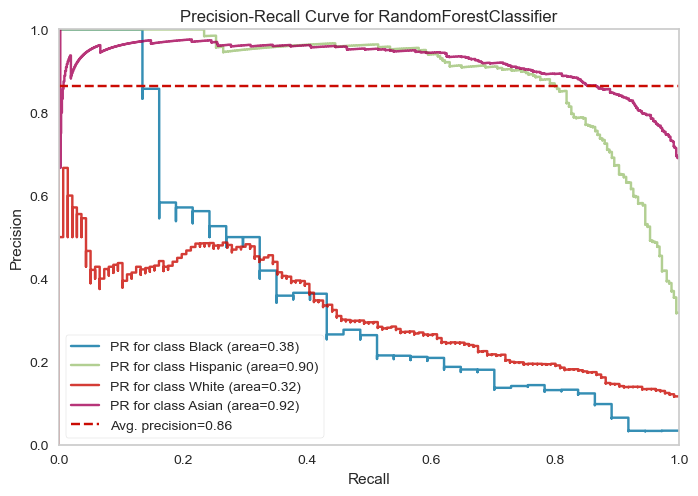

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [242]:
model= RandomForestClassifier(class_weight="balanced", random_state=60, max_depth=10, n_estimators=500)
viz = PrecisionRecallCurve (model, per_class=True, classes= ["Black", "Hispanic", "White", "Asian"], camp="Set1")
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show()

In [ ]:
#Max depth biraz daha düsürülerek sonuclar iyilestirilebilir

In [ ]:
y_pred = rf_grid_model.predict(X_test2)
rf_AP = viz.score
rf_f1 =f1.score(y_test2, y_pred, average=None, labels =["Hispanic"])
rf_recall=recall_score

## 4. XGBoost

### Vanilla XGBoost Model

In [243]:
import xgboost as xgb

In [244]:
xgb.__version__

'1.6.1'

In [ ]:
# iyi, versiyonumuz yüksek..

In [265]:
xgb_model = XGBClassifier(random_state=60)

In [266]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_sample_weight(class_weight="balanced", y=y_train2)
class_weights

array([2.19383057, 0.39276294, 0.39276294, ..., 1.14763969, 0.39276294,
       0.39276294])

In [267]:
comp = pd.DataFrame(class_weights)
comp["label"]=y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0    
Asian     7.889     151
Black     1.148    1038
Hispanic  2.194     543
White     0.393    3033
Name: 0, dtype: int64

In [268]:
xgb_model.fit(X_train2, y_train2, sample_weight=class_weights) # class weights"in balance olmasi icin aslinda..

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got ['Asian' 'Black' 'Hispanic' 'White']

In [ ]:
# calismadi, neden calismadigini anlayamadim.. Belki de get_dummies'in XGBoost icin olanini yapmadik, ondan oldu galiba.. 

In [ ]:
#Buradan sonrasini tekrar etmeye gerek yok.. Calismadi.. Ordinary'yi de yapmaya calistim o da olmadi..

In [ ]:
#Videoya bakiyorum, hocanin önünde hazir, entere bile bastigi yok.. 1 saat de buna ugrastim.. 

In [269]:
xgb_model.fit(X_train2, y_train2)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got ['Asian' 'Black' 'Hispanic' 'White']

In [ ]:
#belki de versiyon farkliligindandir.

### XGBoost Model GridsearchCV

In [251]:
param_grid= {"n_estimators" : [50,100],
            "max_depth": [1,2], "learning_rate" : [0.1, 0.3], "subsample" : [0.8, 1], "colsample_bytree" : [0.8,1]}

In [272]:
xgb_model=XGBClassifier (random_state=60)
xgb_grid_model=GridSearchCV(xgb_model, param_grid, scoring = recall_Hispanic, n_jobs= 1, verbose=2).fit(X_train2, y_train2, sample_weight=class_weights)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....................max_depth=10, n_estimators=400; total time=   0.0s
[CV] END .....................max_depth=10, n_estimators=400; total time=   0.0s
[CV] END .....................max_depth=10, n_estimators=400; total time=   0.0s
[CV] END .....................max_depth=10, n_estimators=400; total time=   0.0s
[CV] END .....................max_depth=10, n_estimators=400; total time=   0.0s
[CV] END .....................max_depth=10, n_estimators=500; total time=   0.0s
[CV] END .....................max_depth=10, n_estimators=500; total time=   0.0s
[CV] END .....................max_depth=10, n_estimators=500; total time=   0.0s
[CV] END .....................max_depth=10, n_estimators=500; total time=   0.0s
[CV] END .....................max_depth=10, n_estimators=500; total time=   0.0s
[CV] END .....................max_depth=12, n_estimators=400; total time=   0.0s
[CV] END .....................max_depth=12, n_est

NotFittedError: All estimators failed to fit

In [ ]:
#bunu da yapmadi, machine learning patladi..

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [273]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7115888411025348

In [274]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7030571311690612

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [275]:
pip install shap

     -------------------------------------- 431.3/431.3 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 40.8/40.8 kB ? eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
Note: you may need to restart the kernel to use updated packages.


In [277]:
import shap
explainer = shap.Explainer(pipe_log_model,X_train) #log_model'i pipe_log_model olarak degistirdim..
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

Exception: The passed model is not callable and cannot be analyzed directly with the given masker! Model: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=60))])

In [ ]:
# Her iki durum da da hata verdi

In [278]:
shap_values

NameError: name 'shap_values' is not defined

In [ ]:
print(shap_values[0].shape)

(1, 232)


In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

 Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [ ]:
# Eniyisi logistic regression gözüküyor..

In [279]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight="balanced",max_iter=10000, random_state=60) )]
son_model= Pipeline(steps=operations)
son_model.fit(X,y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=60))])

In [ ]:
# görüldügü üzere X ve y ile ilgili bir problem yok, calisiyor.. 

In [ ]:
# Hocam calismayan satirlar ile ilgili müsait zamaninizda bir sekilde dönüs yaparsaniz sevinirim..

In [281]:
mean_human=X.describe().loc["mean"]

In [283]:
son_model.predict([mean_human])

array(['White'], dtype=object)

In [ ]:
#Ortalama bir insan white cikiyor. 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___